In [1]:
!pip install keras
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Importing Dependencies**

In [2]:
# Importing Libraries
import numpy as np
import pandas as pd # data processing, CSV file I/O
import os 
import random
# Importing the library for Data Visualization
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
import seaborn as sns 
import cv2
# for enabling inline plotting
%matplotlib inline

# Importing the Tensorflow for model creation and its dependencies
import tensorflow
# Generate the batches of tensor image data with real-time data augmentation.
from keras.preprocessing.image import ImageDataGenerator


In [3]:
# given image dataset is recognized correctly or not
train_image_path = r'/content/drive/MyDrive/ImageClassification/train'
test_image_path = r'/content/drive/MyDrive/ImageClassification/test'
valid_mage_path = r'/content/drive/MyDrive/ImageClassification/valid'

In [5]:
# defining pre-processing transformations on raw dataset images of training image data
train_img_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True)

# defining pre-processing transformations on raw dataset images of testing image data
test_img_datagen = ImageDataGenerator(rescale=1./255)

# generating the training Data
training_set = train_img_datagen.flow_from_directory(
        train_image_path,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')


# generating the testing image data
test_set = test_img_datagen.flow_from_directory(
        test_image_path,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')

# Generating the testing image data
valid_set = test_img_datagen.flow_from_directory(
        valid_mage_path,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')

Found 650 images belonging to 13 classes.
Found 65 images belonging to 13 classes.
Found 65 images belonging to 13 classes.


### Reading the Images data

In [6]:
# showImages() function to plot any random image from dataset
def showImages(class_name):
    random_index = random.choice(list(range(1, 49)))
    folder_path=os.path.join(train_image_path, class_name)
    try:
        image_path=os.path.join(folder_path,str(random_index).zfill(3)+".jpg")
        plt.imshow(mpimg.imread(image_path))
    except:
        image_path=os.path.join(folder_path,str(random_index).zfill(2)+".jpg")
        plt.imshow(mpimg.imread(image_path))
    plt.title(class_name)
    plt.axis(False)

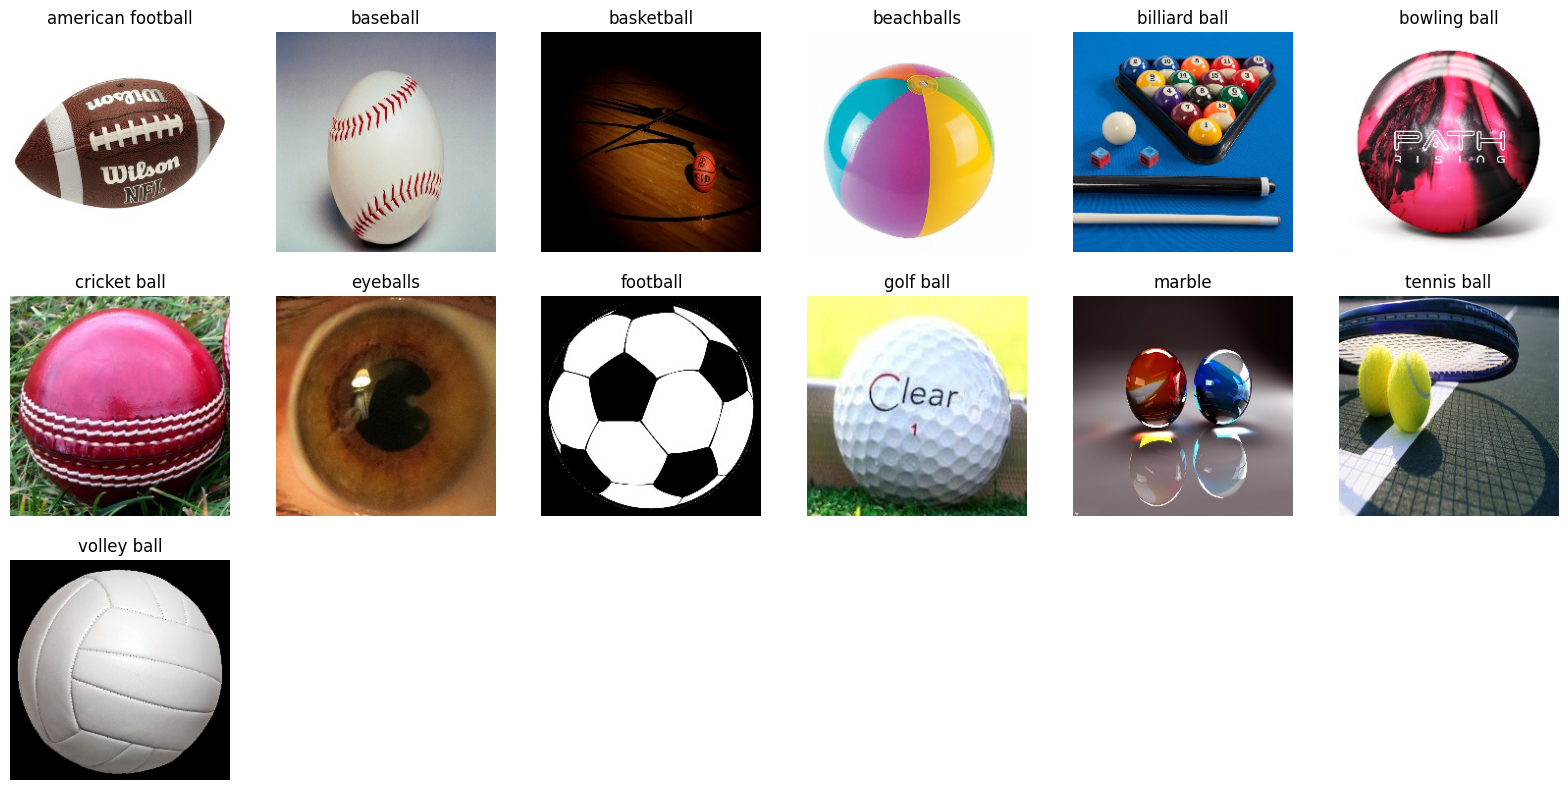

In [7]:
plt.figure(figsize = (20,20))
for labels, num in training_set.class_indices.items():
    plt.subplot(6,6,num+1)
    showImages(labels)

In [ ]:
#training_set.class_indices

In [8]:
# printing class labels for each ball image
test_set.class_indices

{'american football': 0,
 'baseball': 1,
 'basketball': 2,
 'beachballs': 3,
 'billiard ball': 4,
 'bowling ball': 5,
 'cricket ball': 6,
 'eyeballs': 7,
 'football': 8,
 'golf ball': 9,
 'marble': 10,
 'tennis ball': 11,
 'volley ball': 12}

### Creating a list of images and classes

In [9]:
# class_indices have the numeric tag for each balls
train_classes=training_set.class_indices

# Storing the face and the numeric tag for future reference
result_map = {}
for ball_value,ball_name in zip(train_classes.values(),train_classes.keys()):
    result_map[ball_value] = ball_name

In [12]:
# saving the face map for future reference
import pickle
with open(R"/content/drive/MyDrive/ImageClassification/resultsmap.pkl", 'wb') as f:
    pickle.dump(result_map, f, pickle.HIGHEST_PROTOCOL)
print("Mapping of image and id",result_map)

Mapping of image and id {0: 'american football', 1: 'baseball', 2: 'basketball', 3: 'beachballs', 4: 'billiard ball', 5: 'bowling ball', 6: 'cricket ball', 7: 'eyeballs', 8: 'football', 9: 'golf ball', 10: 'marble', 11: 'tennis ball', 12: 'volley ball'}


In [13]:
# the number of neurons for the output layer is equal to the number of images
output_neurons=len(result_map)
print('\n The number of output neurons: ', output_neurons)


 The number of output neurons:  13


### Building the CNN Model

In [14]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

In [16]:
# Initializing the CNN
classifier= Sequential()

# Create CNN Model
###* STEP--1 Convolution
##### 1. Adding the first layer of CNN
##### 2. we are using the format (64,64,3) because we are using TensorFlow backend
##### 3. It means 3 matrix of size (64X64) pixels representing Red, Green and Blue components of pixels
###* STEP--2 MAX Pooling
###* STEP--3 FLattening
###* STEP--4 Fully Connected Neural Network
###*  Compiling the CNN

In [18]:
# STEP--1 Convolution
classifier.add(Convolution2D(32, kernel_size=(3, 3), strides=(1, 1), input_shape=(128,128,3), activation='relu'))

# STEP--2 MAX Pooling
classifier.add(MaxPool2D(pool_size=(2,2)))
# ADDITIONAL LAYER of CONVOLUTION for better accuracy 
classifier.add(Convolution2D(64, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))

# STEP--3 FLattening
classifier.add(Flatten())

# STEP--4 Fully Connected Neural Network
classifier.add(Dense(256, activation='relu'))
classifier.add(Dense(output_neurons, activation='softmax'))

# Compiling the CNN
classifier.compile(loss='categorical_crossentropy', optimizer = 'rmsprop', metrics=["accuracy"])
#classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [19]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 57600)             0

### Fitting the model

In [20]:
import time
# measuring the time taken by the model to train
start_time = time.time()
# the model training
model_history=classifier.fit_generator(
                                        training_set,
                                        steps_per_epoch=len(training_set),
                                        epochs=20,
                                        validation_data=valid_set,
                                        validation_steps=len(valid_set),
                                        verbose=1)

end_time = time.time()
print(" Total Time Taken: ", round((end_time-start_time)/60), 'Minutes')

<ipython-input-20-2d551c4b925c>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history=classifier.fit_generator(


Epoch 1/20
21/21 [==============================] - 272s 13s/step - loss: 3.8080 - accuracy: 0.1154 - val_loss: 2.3721 - val_accuracy: 0.2000
Epoch 2/20
21/21 [==============================] - 34s 2s/step - loss: 2.3011 - accuracy: 0.2800 - val_loss: 2.1041 - val_accuracy: 0.3077
Epoch 3/20
21/21 [==============================] - 35s 2s/step - loss: 2.0336 - accuracy: 0.3908 - val_loss: 1.6917 - val_accuracy: 0.4462
Epoch 4/20
21/21 [==============================] - 36s 2s/step - loss: 1.6158 - accuracy: 0.5062 - val_loss: 1.4072 - val_accuracy: 0.6000
Epoch 5/20
21/21 [==============================] - 36s 2s/step - loss: 1.3893 - accuracy: 0.5769 - val_loss: 1.3621 - val_accuracy: 0.5538
Epoch 6/20
21/21 [==============================] - 35s 2s/step - loss: 1.0909 - accuracy: 0.6692 - val_loss: 1.1598 - val_accuracy: 0.6154
Epoch 7/20
21/21 [==============================] - 35s 2s/step - loss: 0.8989 - accuracy: 0.7231 - val_loss: 1.2292 - val_accuracy: 0.6154
Epoch 8/20
21/21 [

In [21]:
accuracy = model_history.history['accuracy']
val_accuracy  = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

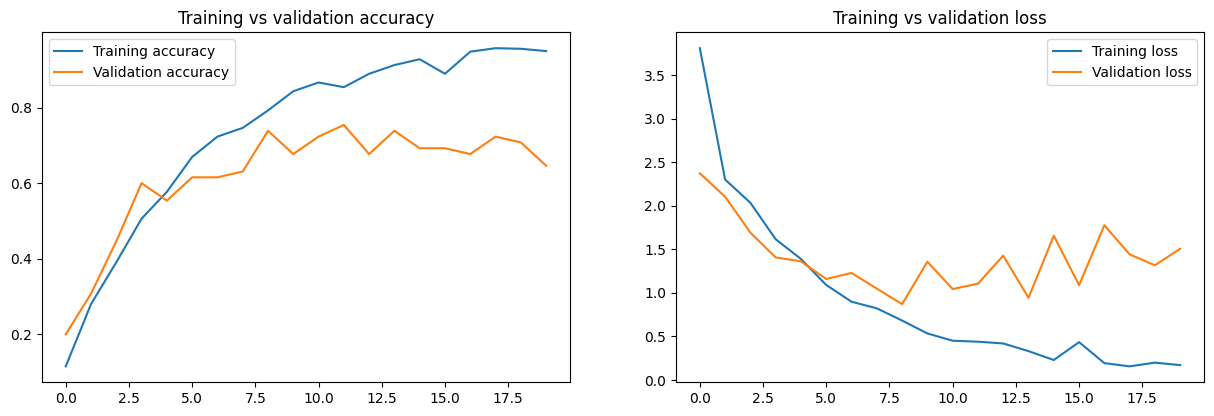

In [22]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
plt.plot(accuracy, label = "Training accuracy")
plt.plot(val_accuracy, label="Validation accuracy")
plt.legend()
plt.title("Training vs validation accuracy")

plt.subplot(2,2,2)
plt.plot(loss, label = "Training loss")
plt.plot(val_loss, label="Validation loss")
plt.legend()
plt.title("Training vs validation loss")

plt.show()

### Saving the model

In [23]:
## Saving the model
classifier.save(r"/content/drive/MyDrive/ImageClassification/cnn_classifier.pkl")

### Testing the model on a different image

In [24]:
from tensorflow.keras.utils import load_img, img_to_array

In [30]:
# Making single image predictions 
_testImage = r"/content/drive/MyDrive/ImageClassification/test/golf ball/4.jpg"
test_image = load_img(_testImage,target_size=(128, 128))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = classifier.predict(test_image,verbose=0)

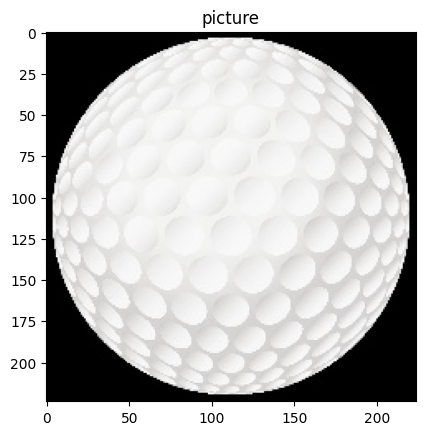

In [31]:
img = cv2.imread(_testImage)
# gray = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(img)
plt.title('picture')
plt.show()

In [32]:
print('The prediction result is: ',result_map[np.argmax(result)])

The prediction result is:  golf ball


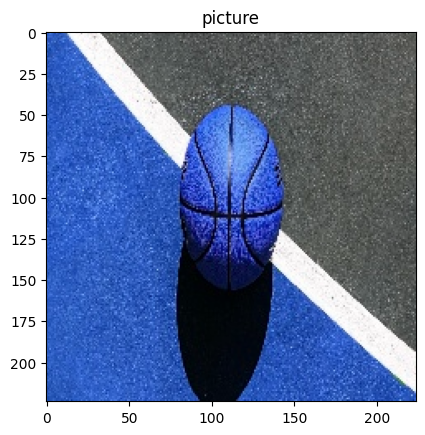

The prediction result is:  basketball


In [33]:
# Making another single image predictions 
_testImage = r"/content/drive/MyDrive/ImageClassification/test/basketball/2.jpg"
test_image = load_img(_testImage,target_size=(128, 128))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = classifier.predict(test_image,verbose=0)

img = cv2.imread(_testImage)
# gray = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(img)
plt.title('picture')
plt.show()

print('The prediction result is: ',result_map[np.argmax(result)])